# Bitcoin
# ist eine dezentral verwaltete Währung und die bekannteste Kryptowährung der Welt.
# Jeder kann weltweit mit Bitcoin handeln, der Kurswert ergibt sich wie auf dem Aktienmarkt.
# Der Kurs ist anders als bei herrkömliche Währungen besonders volatil.
# Anhand unsere Daten versuchen wir die Kursentwicklung besser zu verstehen.
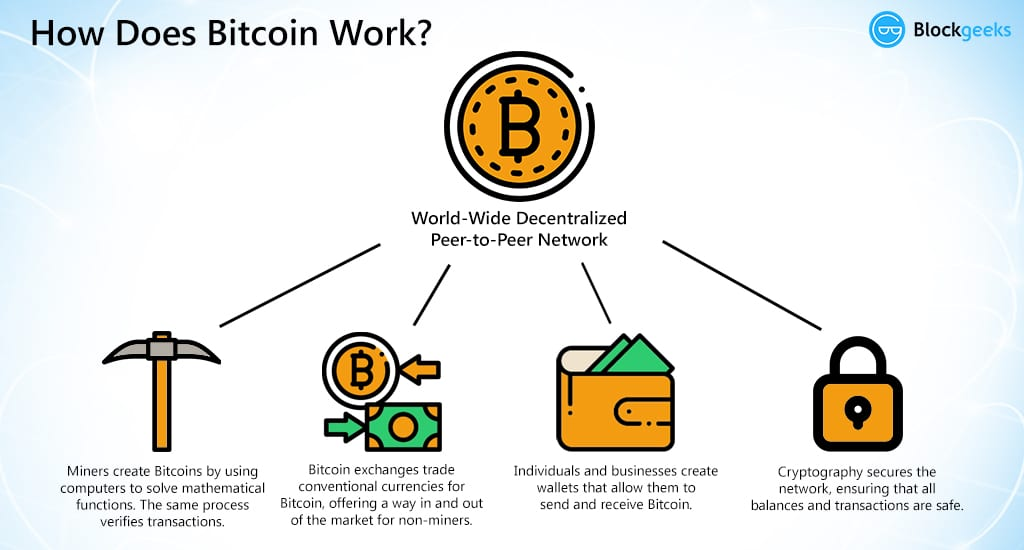
https://blockgeeks.com/wp-content/uploads/2016/12/howdoesbitcoinwork.jpg


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# **Bitcoin Historical Data - Jan 2012 to Sept 2020**
# **Datavisualisation**

loading and cleaning data:

In [ ]:
data = pd.read_csv("../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")
data.Timestamp = pd.to_datetime(data.Timestamp, unit='s')
#cleaning data:
data = data.dropna()
data.Timestamp = data.Timestamp.apply(lambda x: dt.datetime(x.year,x.month,x.day))
data.head(500)

## Timeline of Bitcoin weighted price daily mean

In [ ]:
data_days_avg = data.groupby("Timestamp", as_index = False).agg("mean")

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(20, 7))
ax = sns.lineplot(x="Timestamp", y="Weighted_Price", data=data_days_avg)
ax.set(ylabel="Weighted Price")
plt.show()

## Timeline of traded Bitcoin volume per day

In [ ]:
data_days_sum = data.groupby("Timestamp", as_index = False).agg("sum")

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(20, 7))
ax = sns.lineplot(x="Timestamp", y="Volume_(BTC)", data=data_days_sum)
ax.set(ylabel="Volume BTC")
plt.show()

## Timeline of traded Bitcoin Volume in USD per day

In [ ]:
data_days_sum = data.groupby("Timestamp", as_index = False).agg("sum")

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(20, 7))
ax = sns.lineplot(x="Timestamp", y="Volume_(Currency)", data=data_days_sum)
ax.set(ylabel="Volume (Currency)")
plt.show()

## Comparison of daily Bitcoin volume in USD and weighted price 

In [ ]:
data_agg_days = pd.read_csv("../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")
data_agg_days.Timestamp = pd.to_datetime(data_agg_days.Timestamp, unit='s')
data_agg_days = data_agg_days.dropna()
data_agg_days.Timestamp = data_agg_days.Timestamp.apply(lambda x: dt.datetime(x.year, x.month, x.day))
data_agg_days.Timestamp = data_agg_days.Timestamp.apply(lambda x: x.strftime('%Y-%m-%d'))

data_normalized = data_agg_days.groupby("Timestamp", as_index = False).agg("mean")
data_normalized["Weighted Price"] = data_normalized["Weighted_Price"].apply\
(lambda x: (x - data_normalized["Weighted_Price"].min()) / (data_normalized["Weighted_Price"].max() - data_normalized["Weighted_Price"].min()))
data_normalized["Volume (Currency)"] = data_normalized["Volume_(Currency)"].apply\
(lambda x: (x - data_normalized["Volume_(Currency)"].min()) / (data_normalized["Volume_(Currency)"].max() - data_normalized["Volume_(Currency)"].min()))


fig = plt.figure(figsize=(30,10))
plt.plot( 'Timestamp', 'Volume (Currency)', data=data_normalized, color='red', alpha=0.4)
plt.plot( 'Timestamp', 'Weighted Price', data=data_normalized, color='lightblue')

plt.tick_params(
    axis='x',      
    which='both',      
    bottom=False,
    top=False,
    labelbottom=True)

plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.xticks(("2012-01-01", "2013-01-01", "2014-01-01", "2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01","2019-01-01", "2020-01-01", "2021-01-01"))

plt.legend()

plt.show()

## Comparison of monthly Bitcoin volume in USD and weighted price 

In [ ]:
data_agg_weeks = pd.read_csv("../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")
data_agg_weeks.Timestamp = pd.to_datetime(data_agg_weeks.Timestamp, unit='s')
data_agg_weeks = data_agg_weeks.dropna()
data_agg_weeks.Timestamp = data_agg_weeks.Timestamp.apply(lambda x: dt.datetime(x.year, x.month, x.day))
data_agg_weeks.Timestamp = data_agg_weeks.Timestamp.apply(lambda x: x.strftime('%Y-%m'))

data_normalized = data_agg_weeks.groupby("Timestamp", as_index = False).agg("mean")
data_normalized["Weighted Price"] = data_normalized["Weighted_Price"].apply\
(lambda x: (x - data_normalized["Weighted_Price"].min()) / (data_normalized["Weighted_Price"].max() - data_normalized["Weighted_Price"].min()))

data_normalized["Volume (Currency)"] = data_normalized["Volume_(Currency)"].apply\
(lambda x: (x - data_normalized["Volume_(Currency)"].min()) / (data_normalized["Volume_(Currency)"].max() - data_normalized["Volume_(Currency)"].min()))

fig = plt.figure(figsize=(30,10))
plt.plot( 'Timestamp', 'Volume (Currency)', data=data_normalized, color='red', alpha=0.4)
plt.plot( 'Timestamp', 'Weighted Price', data=data_normalized, color='skyblue')

plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=True)

plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.xticks(("2012-01", "2013-01", "2014-01", "2015-01", "2016-01", "2017-01", "2018-01","2019-01", "2020-01", "2021-01"))

plt.legend()

plt.show()

In [ ]:
data_normalized = data_agg_weeks.groupby("Timestamp", as_index = False).agg("mean")
data_normalized["Weighted_Price"] = data_normalized["Weighted_Price"].apply\
(lambda x: (x - data_normalized["Weighted_Price"].min()) / (data_normalized["Weighted_Price"].max() - data_normalized["Weighted_Price"].min()))

data_normalized["Volume_(Currency)"] = data_normalized["Volume_(Currency)"].apply\
(lambda x: (x - data_normalized["Volume_(Currency)"].min()) / (data_normalized["Volume_(Currency)"].max() - data_normalized["Volume_(Currency)"].min()))

#plt.rcParams.update({'font.size': 12})
#fig, ax = plt.subplots(figsize=(20, 7))
#ax = sns.lineplot(x="Timestamp", y="Weighted_Price", data=data_normalized)

fig = plt.figure(figsize=(30,10))
plt.plot( 'Timestamp', 'Volume_(Currency)', data=data_normalized, color='red', alpha=0.4)
plt.plot( 'Timestamp', 'Weighted_Price', data=data_normalized, color='skyblue')
plt.legend()

In [ ]:
# data_agg_weeks = pd.read_csv("../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")
# data_agg_weeks.Timestamp = pd.to_datetime(data_agg_weeks.Timestamp, unit='s')
# data_agg_weeks = data_agg_weeks.dropna()
# data_agg_weeks.Timestamp = data_agg_weeks.Timestamp.apply(lambda x: dt.datetime(x.year, x.month, x.day))
# data_agg_weeks.Timestamp = data_agg_weeks.Timestamp.apply(lambda x: x.strftime('%Y-%m-%W-%d'))

# data_agg_weeks = data_agg_weeks.groupby("Timestamp", as_index = False).agg("mean")



# def _helper(start, end):
#     tmp = []
#     for i in range(start, end):
#         tmp.append(data_agg_weeks.loc[i, "Weighted_Price"])
        
#     helper = 4711
#     min_ind = 0
#     for i in range(len(tmp)):
#         if(tmp[i] < helper):
#             helper = tmp[i]
#             min_ind = i
            
#     print(tmp)
#     return min_ind
            
        

# Weekdays = [0, 0, 0, 0, 0, 0, 0]
# prev_rows = 0
# akt_week = 52
# for i in range(len(data_agg_weeks)): 
#     if(int(data_agg_weeks.loc[i, "Timestamp"].rsplit('-')[2]) == int(akt_week)):
#         Weekdays[_helper(prev_rows, i)] = Weekdays[_helper(prev_rows, i)] + 1
#         akt_week = data_agg_weeks.loc[i, "Timestamp"].rsplit('-')[2]
#         prev_rows = i
#         print((i - 1) - prev_rows)
#         print(data_agg_weeks.loc[i, "Timestamp"].rsplit('-')[2])


# print(Weekdays)


## Best Day of Week to Buy

### Determine which day of the week most often has the lowest price.


In [ ]:
data = pd.read_csv("../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")
data.Timestamp = pd.to_datetime(data.Timestamp, unit='s')
data = data.dropna()

dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['Day of Week'] = data['Timestamp'].dt.dayofweek.map(dayOfWeek)

# find indices with min value of that week
idx = data.groupby([pd.Grouper(key='Timestamp', freq='W-MON')])['Weighted_Price'].transform(min) == data['Weighted_Price']

# remove duplicate day rows
weekly_lows = data[idx].groupby([pd.Grouper(key='Timestamp', freq='D')]).first().reset_index()
weekly_lows = weekly_lows.dropna()


sns.countplot(x='Day of Week',data=weekly_lows, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])



## Best Time of Day to Buy

### Determine what time of day most often has the lowest price.


In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
data = pd.read_csv("../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")
data.Timestamp = pd.to_datetime(data.Timestamp, unit='s')
data = data.dropna()

dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['Day of Week'] = data['Timestamp'].dt.dayofweek.map(dayOfWeek)

data['Time Decimal'] = data['Timestamp'].dt.hour + data['Timestamp'].dt.minute/60


daily_lows = data[data.groupby([pd.Grouper(key='Timestamp', freq='D')])['Weighted_Price'].transform(min) == data['Weighted_Price']]
sns.boxplot(x="Day of Week", y="Time Decimal", data=daily_lows, palette='rainbow')



In [ ]:
box_tracer = []
for key, day in dayOfWeek.items():
    box_tracer.append(
        go.Box(
            y = daily_lows[daily_lows['Day of Week'] == day]['Time Decimal'],
            name = day
        )
    )
iplot(box_tracer)

In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data_15_20 = data
data_15_20.dropna()

# create valid date range
start = dt.datetime(2015, 1, 1, 0, 0, 0, 0)

# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows = data_15_20[(data_15_20['Timestamp'] >= start)].groupby([pd.Grouper(key='Timestamp', freq='W-MON')]).first().reset_index()
weekly_rows.head()

dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data_15_20['Day of Week'] = data_15_20['Timestamp'].dt.dayofweek.map(dayOfWeek)

data_15_20['Time Decimal'] = data_15_20['Timestamp'].dt.hour + data_15_20['Timestamp'].dt.minute/60


daily_lows = data_15_20[data_15_20.groupby([pd.Grouper(key='Timestamp', freq='D')])['Weighted_Price'].transform(min) == data_15_20['Weighted_Price']]
sns.boxplot(x="Day of Week", y="Time Decimal", data=daily_lows, palette='rainbow')

box_tracer = []
for key, day in dayOfWeek.items():
    box_tracer.append(
        go.Box(
            y = daily_lows[daily_lows['Day of Week'] == day]['Time Decimal'],
            name = day
        )
    )
iplot(box_tracer)

print(daily_lows)




